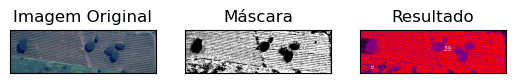

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

frame = cv2.imread('cafe3.png')
# Converter a imagem de BGR para espaço de cor HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Definindo o intervalo de cor branca
limiar = 127
lower_white = np.array([0, 0, 0], dtype=np.uint8)
upper_white = np.array([limiar, limiar, limiar], dtype=np.uint8)

# Mascara para identificar áreas brancas
mask_white = cv2.inRange(hsv, lower_white, upper_white)

# Procurar contornos na máscara
contours, _ = cv2.findContours(mask_white, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

result = np.zeros_like(frame)

purple_color = (128, 0, 128)  # Roxo

# Iterar através dos contornos
for i, contour in enumerate(contours):
    # Calcular a área do contorno
    area = cv2.contourArea(contour)
    if area > 1000:
        # Desenhar areas identificadas como linhas de café
        cv2.drawContours(result, [contour], -1, (0, 0, 255), -1)
        
        # Calcular o centróide do contorno
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            
            # Anotar o número da rua próximo ao centróide
            cv2.putText(result, str(i + 1), (cX + 10, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Pintar as áreas entre as linhas de café e as árvores com a cor roxa
result[mask_white == 0] = purple_color

# Definir títulos e imagens para plotagem
titles = ['Imagem Original', 'Máscara', 'Resultado']
images = [frame, mask_white, result]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    if i == 1:  
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.savefig('result.pdf')

plt.show()

